This notebook is centered around the data labeling process. It involves manually labeling the impact sentences. The sentences are categorized into six distinct variables, as detailed below and illustrated in the accompanying table:
- s_para_s: sentences from paragraphs that describe structural impact.
- s_para_c: sentences from paragraphs that describe community impact.
- s_para_n: sentences from paragraphs that describe structural & community impact.
- s_table_s: sentences from tables that describe structural impact.
- s_table_c: sentences from tables that describe community impact.
- s_table_n: sentences from tables that describe structural & community impact.

To ensure that the labeled sentences above correspond with those from the preprocessing file, it is advisable to use the text_body output for sentences extracted from paragraphs and the text_table output for sentences from tables, as processed in the 1b_preprocessing step.

Please remember to paste the input_path (which is the location of the 0_input.ipynb file) at the beginning of this notebook to ensure all necessary information is loaded for code execution.

Recommended Google Colab Runtime Type: CPU, as this notebook does not involve running machine learning models.

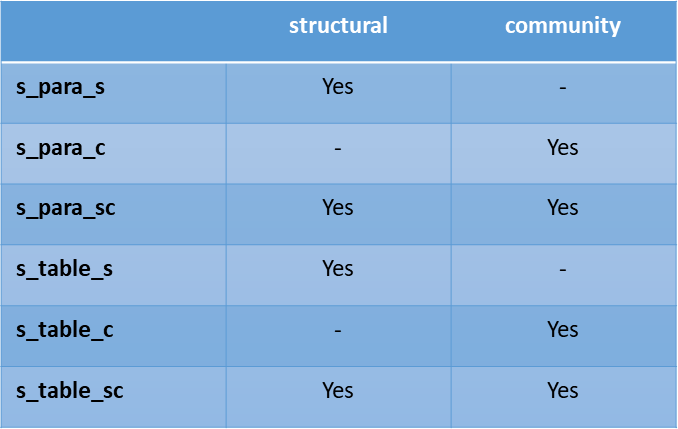

In [1]:
# Input file path (must navigate at the beginning of each file)
input_path = "/content/drive/My Drive/ImpactDataMining/Turkiye_Earthquake/Result"

In [2]:
s_para_s = [
    'Due to the shallow depth of the earthquake and a bilateral rupture towards the southwest and the northeast with an area of approximately 100 km × 75 km, the earthquake impacted 10 provinces in Türkiye and several others in Syria, resulting in significant casualties due to the collapse of many buildings.',
    'As a result of this sequence of earthquakes and aftershocks, around 28,500 buildings partially or completely collapsed, while another 66,000 buildings were severely damaged in Türkiye.',
    'In Syria, more than 22,000 buildings were affected by the earthquakes, with 2,850 of them partially/completely collapsed or severely damaged.',
    'Around half of the buildings in the affected regions of Türkiye were constructed before 2000, i.e., before modern principles of earthquake design were implemented in the Turkish Seismic Code.',
    'Fragility functions developed for the building stock in the area showed that collapse under large shaking was possible for these relatively older buildings.',
    'However, several collapses of buildings constructed after 2000 were also observed.',
    'There are several reasons for the collapse of these relatively newer buildings, including: (a) ground motions exceeding MCE levels, (b) impact of a sequence of large ground motions with compounding effects, (c) possibility of buildings not designed according to seismic code provisions, and (d) possibility of construction that did not comply with the design and specifications in the structural drawings.',
    'Compared to the response of buildings, other infrastructure performance was generally acceptable, with most of the bridges, roads and tunnels remaining operational, and no major issues with the power grid and water supply infrastructure.',
    'Seismic isolation was employed in these hospitals, as required by law for hospitals with 100+ beds in seismic zones I and II after 2013.',
    'Their operational performance was in major contrast with the observed collapses of some of the hospitals that were not seismically isolated.',
    'As of February 19, 2023, the number of reported completely and partially collapsed buildings was 28,362 according to the Turkish Ministry of Environment, Urbanization and Climate Change, EUCC.',
    'Additionally, according to preliminary damage assessments, it was announced by the Minister of Environment, Urbanization and Climate Change, Mr. Murat Kurum, that 75,717 buildings and 306,563 dwellings were either collapsed or severely damaged (NTV 2023a).',
    'These numbers continued to evolve in the weeks that followed the earthquake, with damage encompassing residential, governmental, and commercial buildings.',
    'Since these numbers are provided by the official reports of EUCC, they only reflect losses in Türkiye.',
    'However, when the shaking experienced significantly exceeds the design levels, the provided ductility and energy dissipation capacity delivered by these principles of seismic design may not be sufficient and can lead to collapse.',
    'Furthermore, it is possible that seismic detailing required by the code might not have been followed in the actual construction.',
    'For earthquake-resistant buildings, some degree of damage is expected when they are subjected to the design earthquake intensity, and this damage is generally repairable.',
    'However, when the shaking level significantly exceeds the design levels, such seismic design details may not be adequate to prevent collapse.',
    'This may explain the collapse of several mid-rise buildings in Kahramanmaras.',
    'Finally, around 50% of the building stock in this area was constructed before 2000 and are more vulnerable under the experienced excessive levels of shaking.',
    'Another important factor related to the observed collapses is the demand that resulted from a Mw 7.7 earthquake followed by another earthquake (Mw 7.6) of a comparable size, and the high intensity aftershocks in between.',
    'The above discussion holds for stations 4612 (20 km epicentral distance) and 3123 (143 km epicentral distance) in Kahramanmaras and Hatay, respectively, with the difference that these are sites with softer soils with ground motions exceeding MCE levels at periods larger than 1.00 s. In particular, the ground motion in Hatay was multiple times larger than the MCE levels.',
    'This explains the widespread destruction observed in this city.',
    'Another major factor that might have contributed to the collapse of some relatively newer structures that were supposed to be earthquake-resistant is the cascading hazard effect from the strong aftershocks, especially the second earthquake of Mw 7.6.',
    'Several mid-rise buildings that survived the main shock (per the design intent), collapsed during the Mw 7.6 earthquake.',
    'It is likely that damage and inelastic behavior caused by the Mw 7.7 earthquake weakened these buildings.',
    'Strong aftershocks and the second major event within a few hours of the mainshock imposed large demands on the already “plastic” structures with significant strength and stiffness degradation.',
    'In the N-S direction, the spectral accelerations exceed 1g for periods of 1.00 to 2.00 s with the potential of causing heavy damage in high-rise buildings (10 stories and higher).',
    'This aligns with reports that “the downtown district with taller buildings was hit particularly hard, while residential areas outside the city center had less apparent destruction” (Abraham et al.2023).',
    'Comparing the response spectra at TK.4612 with the hazard spectra indicates that observed shaking exceeds the DBE level hazard spectra (10% exceedance in 50 years, or 475-year return period) at almost all periods and exceeds the MCE level hazard spectra (2% exceedance in 50 years, or 2475-year return period) at all periods above about 0.50 s. Engineered structures that are designed to resist seismic forces are typically designed to prevent collapse at MCE-level shaking.',
    'As a result, tall buildings at this location that would have been engineered to prevent collapse at MCE levels could experience heavy damage or collapse in this earthquake given that the shaking exceeded the MCE levels by a factor of 2 to 3 for certain periods.',
    'The impact of the earthquake sequence on buildings is clearly location dependent.',
    'As a result, engineered buildings at this location may be able to withstand this shaking without collapse, albeit while sustaining moderate to heavy damage.',
    'As discussed above, high shaking levels as shown by the response spectra, structural system degradation during long duration of shaking from the two main events and aftershocks, and the occurrence of the earthquake sequence with strong multiple aftershocks, should all be considered altogether.',
    'The use of ready mixed concrete and deformed reinforcement bars became more widespread.',
    'Based on these developments, the buildings constructed after 2000 are assumed to have enhanced quality and considered to be less vulnerable to earthquake events.',
    'Building data from TÜIK and field studies in Gaziantep city, where the first earthquake hit, reveal that almost two-thirds of the residential buildings are masonry and one-third are Reinforced Concrete (RC).',
    'Most masonry buildings are 1 to 2 story structures, whereas RC buildings are mostly 1 to 4 stories, although some mid-rise and high-rise buildings exist.',
    'Most of the buildings built between 1980 and 2000 are regarded as non- or low-engineered structures.',
    'However, there is evidence that even post-2000 and post-2007, RC and masonry buildings were not properly designed and detailed for adequate ductility and seismic resistance.',
    'According to the observations from previous earthquakes, insufficient engineering design and construction quality are major contributing reasons for the failure of buildings in Türkiye during recent earthquakes.',
    'These deficiencies are manifest in many undesirable structural flaws, such as weak column-strong beam, soft-story, non-ductile detailing of structural members and connections, lack of strength of lateral load carrying systems, and discontinuous frames.',
    'Moreover, removal of the load carrying system members, insufficient geotechnical site investigations, and poor foundation design can be added to the reasons for the observed damage of structural systems.',
    'Furthermore, permits were granted to recently registered buildings of less than 6 stories to allow construction of additional stories (up to 6) despite being non-engineered buildings with unknown column and foundation capacity.',
    'Those additional floors were built completely from hollow concrete block bearing walls, and solid slabs that are 60 to 80 mm thick with no beams and insufficient reinforcing bars.',
    'In this case, as-built conditions were substantially different from the structural drawings.',
    'For instance, the local special moment frames were usually built with substandard quality, reinforcement quantity and details, such as using smaller diameter reinforcing bars or even removing the reinforcement totally from some members.',
    'It is reasonable to assume that most building stock in the earthquake affected areas is non-ductile concrete systems with masonry infill walls or unreinforced bearing masonry wall systems.',
    'The non-ductile concrete systems for multi-story low-rise and mid-rise buildings are either beam and slab gravity frames (may be designed for wind loads in some cases) or flat plates or ribbed/joisted slabs with hollow blocks with no or shallow spandrel beams.',
    'It is noteworthy that the ribbed slabs with no projected/drop beams and the flat plates, in the absence of seismic design and structural walls, are most vulnerable to severe damage and collapse even with moderate earthquake shaking.',
    'The multi-story low-rise and mid-rise non-ductile concrete systems in Northern Syria are evidently thin joist slabs with hollow blocks or flat plates, with no drop beams and no or very shallow spandrel beams that are slightly deeper than the slabs.',
    'Columns are apparently thin with extremely low reinforcement ratios, small diameter reinforcing bars and poor confinement (refer to Figure 3.3).',
    'These buildings appear to be non-engineered or poorly engineered at best with no shear walls, perhaps built post 2011 war.',
    'Concrete quality appears low from inspection of damaged photographs.',
    'For the low-rise buildings (1 to 2 stories) in these areas, unreinforced masonry seems more common.',
    'Similar practices can be observed in other Syrian areas, except that buildings have more stories.',
    'The buildings are older and the use of slab and beam non-ductile concrete frames with infill walls and the unreinforced bearing wall masonry system (both are considered the mainstream construction methods in pre-2011 era) seem to be more common.',
    'Moreover, no shear walls can be observed in any building type.',
    'In this section, typical building damage and collapses are documented, organized by occupancy for residential, commercial, government facilities, schools, hospitals, religious, and historical buildings.',
    'Many buildings collapsed, partially collapsed, or were severely damaged in this earthquake sequence.',
    'According to data from the Türkiye Ministry of Environment, Urbanization and Climate Change as of February 19, the number of buildings in different damaged states are listed in Table 4.1 for nine of the impacted cities in Türkiye.',
    'Figures 4.1 and 4.2 show the map of collapsed, partially collapsed, and severely damaged buildings in several cities in Türkiye.',
    'In Syria, severe building damages and hundreds of building collapses resulted from the two main events and the aftershocks in Northern Syria.',
    'More than 22,000 buildings were affected by the events.',
    'At the time of publication of this report, damage assessment by structural engineers in Syria has provided preliminary rapid visual assessment numbers of the “red-tagged” unsafe buildings to be demolished as 400 buildings in Northern Syria and 275 buildings in other areas.',
    'While there are numerous photographs and videos documenting the damage experienced by single- and multi-family residential buildings following the earthquake sequence, this section presents selected cases that represent observed typical failure mechanisms.',
    'Several single-family and mixed-use multi-family RC buildings collapsed due to the presence of soft/weak first stories.',
    'The first story of the 5-story building in Figure 4.4 is much taller than the other stories, leading to a soft story.',
    'The intact columns of the collapsed building in the above stories show that most of the lateral displacements concentrated at the soft first story, resulting in eventual collapse of the structure.',
    'It is observed that the adjacent building, with glass façades at the first two stories, has also high potential to have soft stories because of the glass façades or openings at the first two stories and the infill walls at the upper stories.',
    'This adjacent building has not collapsed.',
    'The differences in the concrete and reinforcing bar strength, quantity, and detailing could be the reasons why one building collapsed and the adjacent one did not.',
    'However, another reason can be the potential pounding of the first floor of the standing building at a location above the mid-height of the first story corner column of the collapsed building.',
    'This additional shear force could have led to the collapse of the corner column, leading to a progressive collapse.',
    'Another set of adjacent buildings with inadequate seismic gap is shown in Figure 4.5, where one of the buildings collapsed.',
    'Insufficient seismic gap results in increased damage when the adjacent buildings have different periods (e.g., due to different number of stories) and the consequent pounding of buildings due to the asynchronous motions.',
    'Collapse of weak/soft story (due to glass façades of stores at the first story) of adjacent buildings with different number of stories and with insufficient seismic gap is observed in Figure 4.6.',
    'The building in Figure 4.7 has larger openings at the first story, with infill walls at the upper stories, resulting in a weak and soft first story.',
    'It is observed that the first two stories of this building collapsed, where the second story collapse likely occurred due to the impact of the first story collapse.',
    'Out of plane wall failures in all stories of the exterior bay indicate larger accelerations experienced by these walls due to torsional irregularity and the twist of the building.',
    'This building collapsed after the second earthquake (Mw 7.5 in Elbistan).',
    'The 6-story building in Figure 4.8 is a mixed-use building with a pharmacy and a grocery store at the first story, and residential occupancies at the upper stories.',
    'The window openings at the first story and the infill walls at the upper stories resulted in a weak and soft first story, leading to collapse of the first story.',
    'It is likely that the first story glass façades were only at the front of the building, with infill walls at the back and sides.',
    'This nonuniform distribution of infill walls around the perimeter could have increased the torsional response during ground shaking.',
    'The 7-story mixed use RC building in Figure 4.9 likely collapsed due to similar reasons as indicated for the collapse of the 6-story mixed use building in Figure 4.8.',
    'It is located on a street corner with shopfront openings on both streets, and presumably solid fire walls on the back sides of the building.',
    'The torsional effects during ground shaking would impose large shear and bending demands on the front corner column (yellow color in Figure 4.9a).',
    'The video of this event indicates that failure of this column initiated total collapse of the building.',
    'RC frames with unreinforced masonry infill walls is a common structural topology in Türkiye.',
    'In low levels of excitation, these infill walls add to the stiffness and strength of the structure, providing beneficial contributions.',
    'However, even in cases where the infill walls are uniformly distributed along the height of the structure and there are no initial soft or weak stories, brittle failure of the infill walls due to in-plane/out-of-plane interaction can lead to the formation of soft stories during an earthquake (Günay and Mosalam 2015), leading to eventual collapse.',
    'Considering the two strong earthquakes (Mw 7.8 and Mw 7.5) and the aftershocks between them, the formation of soft stories due to infill walls in the first event could have led to the collapse of these structures during the second event, as shown in Figures 4.4 to 4.10.',
    'It is noted that the infill walls of the collapsed buildings discussed above were not isolated from the bounding frames, which is the main reason why the infill walls were an important factor in the formation of weak and soft stories.',
    'Although the current version of the TBSC includes provisions for the inclusion of the infill walls for identification of vertical irregularities and suggests methods for isolating the infill walls from the frames, such isolation and inclusion of infill walls in numerical models are not required.',
    'Revisions in the TBSC for explicit consideration of infill walls and their isolation from the frames should be revisited.',
    'In some of the collapsed buildings, it is possible that the presence of soft and weak stories is accompanied by other characteristics of low ductility response (e.g., inadequate seismic detailing such as lack of confinement at the beam- and column-ends and insufficient transverse reinforcement at beam-column joints).',
    'The particular issue with the detrimental effects of infill walls at large shaking is not specific to only Türkiye.',
    'In addition to their effect on the stiffness of upper stories, masonry infill walls, both at the exterior and interior walls of each floor, add considerable mass to the building, resulting in larger inertial forces developed during ground shaking.',
    'Poor behavior of RC frame structures with masonry infill walls was observed in several previous earthquakes in the world as well (Braga et al.2011; Manfredi et al.2014; Marinković et al.2022).',
    'The 7-story building on a 2-story podium in Figure 4.12 is a mixed-use building, where the podium is used as a commercial space and the 7-story building has residential units.',
    'The first story of the podium structure has glass façades and is weaker and softer than the second story of the podium.',
    'This is a potential reason for the collapse of this building.',
    'As observed from the right figure, all stories of the 7-story building collapsed, likely due to the impact of the podium collapse.',
    'The 2-story buildings in Figure 4.13 might have collapsed due to the combined effect of soft and weak stories and accompanying torsional response.',
    'An important reason for the collapses in the earthquake sequence is that such buildings were subjected to two large magnitude earthquakes (Mw 7.8 and Mw 7.5) and major aftershocks in between.',
    'Figure 4.14 shows a severely damaged building after the first earthquake that continued to collapse hours later during an aftershock putting at risk the lives of first responders.',
    'Therefore, the buildings in the region can be categorized as pre-2000 (not up to date with modern seismic codes) and post-2000 (supposed to be designed according to the modern principles of seismic design).',
    'There is evidence that even post-2000 and post-2007 RC and masonry buildings collapsed.',
    'As noted earlier, there are several reasons for these collapses, including: (a) the ground motions exceeding MCE levels, (b) several large motions experienced by the buildings back-to-back in a sequence, (c) possibility of buildings not designed according to the code, and (d) possibility of the construction and material quality not following the intended design.',
    'Regarding the last two reasons, when buildings are designed as seismically resistant, some degree of repairable damage is expected due to higher earthquake levels than what was considered in the design of these buildings.',
    'However, when the shaking level significantly exceeds the design levels as the case here in this earthquake sequence, details of construction become a major factor to distinguish between collapse and other levels of damage.',
    'An RC residential building with shear walls, newly constructed in 2022, had a catastrophic collapse as shown in before and after images in Figure 4.15.',
    'Another new residential RC building with shear walls collapsed while it was under construction (Figure 4.16).',
    'In this figure, shear walls are oriented along one direction of the building.',
    'Extensive concrete crushing is visible at the shear wall base, denoting sliding-shear failure, as well as diagonal concrete crushing (e.g., refer to the third wall after the corner column), suggesting a combined flexure-shear diagonal failure.',
    'Furthermore, an axial failure of a corner beam-column joint is visible, with a possible under-design or shortage of sufficient confinement.',
    'Significant beam yielding along the orthogonal direction to the building lateral collapse in the shear wall direction might have led to shear and axial failure of the joint.',
    'Another building that has collapsed on its side is shown in Figure 4.17.',
    'There are several potential reasons for this failure: (1) Inadequate foundation, or (2) Initiation of the collapse of the structure from one side, resulting in the toppling of the structure.',
    'It is noted that this type of collapse due to the second reason is known as sidesway collapse, which occurs due to lateral dynamic instability at large lateral displacements, when the lateral strength of the structure degrades significantly.',
    'This type of collapse is different from the ones discussed in earlier images, where the RC buildings mostly collapsed by losing gravity load carrying capacity, much before reaching these excessive lateral displacements.',
    'The sidesway collapse might have occurred in buildings with larger displacement capacities, which have been exceeded by the large demands in this earthquake sequence, while the gravity collapse occurred in buildings with less deformation capacity (ductility) due to presence of vertical irregularities, insufficient confinement, weak-column/strong-beam proportions, or other characteristics of nonductile concrete buildings.',
    'In addition to the numerous failures shown above, Figure 4.19 (b) and (c) show that half of a 15- story mixed-use concrete building collapsed by separation from the other half.',
    'This collapse was reported to occur after a Mw 6.1 aftershock.',
    'From the top view of the building, an excessive reentrant corner can be seen in the middle.',
    'This reentrant corner could have led to excessive stress concentrations at that portion of the building (FEMA-P154, 2012).',
    'This may have caused the splitting of one half of the building from the other contributing to the collapse of the split half.',
    'It is also noted that the same reentrant corner is present in similar buildings in the neighborhood that are standing, hinting at possible other structural issues of this collapsed building.',
    'Another partially collapsed building is shown in Figure 4.20.',
    'It is possible that the failure in the corner of this building took place due to a combined effect of the two horizontal components of the ground motions at the location of the building.',
    'Increased shear forces due to plan torsion irregularity could have contributed to the occurrence of such failure.',
    'As discussed in Section 3, it is likely that most building stock in the earthquake impacted regions in Syria is non-engineered, poorly engineered, or at best gravity-designed non-ductile systems.',
    'The heaviest damage and the most collapses occurred in 4 cities in Syria (Aleppo, Latakia, Idlib, and Hama) and in 40 towns and villages in Northern Syria (Idlib) and its countryside (Reef Idlib), Aleppo and its countryside (Reef Aleppo)), with the most damage concentrated in Jendeyres near Afrin, and Harem near Idlib.',
    'As mentioned in Section 3, non-ductile concrete frames, non-ductile concrete ribbed slabs with hollow blocks and no drop beams, and non-ductile concrete flat plates are the most common RC systems for mid-rise buildings (all RC systems included heavy masonry infills) while the unreinforced masonry bearing walls is more common in low-rise buildings up to 6 stories.',
    'Many buildings in Syria that were damaged during the war are believed to have been rebuilt by individuals with low-quality materials.',
    'Such buildings are expected to be more vulnerable to collapse from earthquake shaking (Naddaf 2023; Mroue and Chehaeb 2023).',
    'There is past evidence of the collapse of war-damaged residential buildings in Aleppo and consequential casualties (Reuters 2023b).',
    'It is unfortunate that the ground motion records by the Syrian stations are not available by the time of publication of this report to help correlate damage to ground motion site spectra.',
    'Several unreinforced masonry multi-family buildings (low-rise and mid-rise) collapsed with a soft-story mechanism or out-of-plane (OOP) masonry failure as presented in Figures 4.21 to 4.23 (refer to shown arrows).',
    'Moreover, video evidence showed OOP failure of masonry infills leading to structural collapse.',
    'Non-ductile concrete construction presented severe damage and collapse in many instances and was believed to have caused the most fatalities and injuries.',
    'In some cases, a non-ductile concrete system is mixed with an unreinforced masonry bearing wall system within the same building, especially for the purpose of adding more floors to an existing building (refer to the building in the red rectangle in Figure 4.26).',
    'Severe damage before complete collapse due to low-quality materials made it sometimes difficult to distinguish from the debris a skeleton RC structure from a bearing wall system.',
    'For instance, while the rubble in Figure 4.26 may suggest all masonry construction, evidence of a few RC columns can still be detected as in the highlighted blue rectangle.',
    'It is evident from the partial collapse photographs that some older buildings in Syria were constructed with no gap to neighboring buildings of the same height, perhaps using the neighboring building as formwork for concrete elements (Figures 4.22, 4.23 and 4.27), which may have helped avoiding total collapse or preventing collapse in some instances.',
    'Pounding effects may have been relatively reduced due to such configurations.',
    'The diaphragm (floor slab) failure was commonly observed in many buildings (Figures 4.27 to 4.29, 4.32 and 4.33) when the horizontal diaphragm is unable to resist lateral forces during strong shaking or it is separated from the vertical system due to anchorage failure.',
    'The absence of slab integrity reinforcement, lack of continuity reinforcement, and poor anchorage to columns are evident in these figures.',
    'Very vulnerable slab-column connection conditions resulted from the absence of beams along with poor anchorage to columns, and in many instances, it is speculated that the collapse sequence was triggered by these vulnerable connections, as shown in the red rectangles in Figure 4.28.',
    'Pancaked collapse of multi-story non-ductile concrete buildings with ribbed slabs and no drop beams was widespread in Syria, more evident in Northern Syria’s newer buildings constructed post 2012 war from low-quality materials as explained in Section 3 (Figures 4.28 to 4.35).',
    'Newer unreinforced masonry bearing wall buildings also suffered extreme damage or collapse.',
    'On the other hand, old buildings of 2 to 3 stories in Syria (even made from adobe or stone masonry) resisted the strong shaking well, with some cracks and light damage, likely due to relatively higher quality of construction and materials prior to 2012.',
    'In concrete buildings that experienced severe damage or partial or total collapse, some common deficiencies can be observed from the collapse photographs, most of which are common in non- ductile concrete buildings, but some are considered excessive due to poor construction quality.',
    'Concrete quality/strength appears very low by visual inspection of texture and color, as well as the severity of crushing following collapse.',
    'Syrian engineers contacted after the event confirmed the low quality of the concrete used.',
    'Thin RC column sections, suggesting no seismic design was conducted, and even in some cases appearing to be under-designed for gravity loads.',
    'This is common in non- engineered buildings.',
    'Thin columns can be observed in many damaged buildings; examples are seen in Figures 4.26 to 4.29, 4.31, and 4.32.',
    'Many buildings had lightly reinforced column sections, with no or little transverse reinforcement, and potentially inadequate lap splices located immediately above the slabs.',
    'Absence of drop (projected) beams below the ribbed slab and flat plate systems.',
    'This creates a slab-column connection situation (no beam-column joints) which is known to perform poorly under severe earthquake shaking unless well reinforced.',
    'Absence of seismic details throughout as seen on most photographs of damage.',
    'These include insufficient anchorage, development length, and continuity of slab reinforcement, and absence of integrity reinforcement.',
    'The orientation of the column section in several buildings is in one direction for all columns, rendering the weak-axis direction of the building, in the absence of shear walls, very vulnerable even to moderate shaking.',
    'These columns are often extremely thin in one direction.',
    'This can be observed in the columns at the right side of the building in Figure 4.30, the exterior columns in Figure 4.31, and all columns in the building in Figure 4.33.',
    'The use of heavy masonry infills either made of stone bricks or hollow concrete blocks.',
    'This practice results in high mass buildings which induce large seismic forces during ground shaking, becoming destructive in the absence of a seismic-resistant lateral system.',
    'Several partial and total collapses of commercial buildings were reported in Türkiye.',
    'In Malatya, Hotel Avsar (a 10-story RC building) and Trend Garden Residence (an 8-story RC building) completely collapsed (Figures 4.37 and 4.38).',
    'According to Google Earth data, the buildings had been renovated during the past two years and appear new.',
    'However, Google Earth imagery shows that the buildings have existed at least since 2001.',
    'Therefore, these buildings are in the category of pre-2000 buildings in Türkiye that were not designed according to the advances in the 1998 version of the TBSC.',
    'This can be one of the reasons for the observed collapse.',
    'Malatya was close to the end of the fault rupture in both the Mw 7.8 and Mw 7.5 earthquakes, impacted by forward directivity.',
    'The large displacement demands due to the forward directivity effects during these two events and the strong aftershocks in between likely contributed to the observed collapse.',
    'Some of the government buildings in Türkiye experienced extensive damage and some collapsed.',
    'For instance, Figure 4.39 shows the collapse of a municipality building in Adiyaman, Türkiye.',
    'Figure 4.40 shows the collapse of the first story and extensive damage to the second and third stories of a municipality building in Afsin, Türkiye.',
    'It is likely that unreinforced masonry is more prevalent in rural areas than in cities.',
    'Despite damage and collapse reports from rural areas in social media, to date, there is only limited visual evidence of damaged unreinforced masonry buildings.',
    'At the time of writing this report, the rescue efforts are ongoing with difficulties in accessing rural areas.',
    'The immense rescue needs in the highly populated areas and the lack of access in reaching rural areas might explain the lack of visual evidence from these regions.',
    'With the available information, damage to a few masonry buildings is discussed in this section.',
    'Figure 4.41 shows the partial collapse of Ciftarslan House external enclosure wall in Kahramanmaraş province.',
    'This house is a 2-story structure built in 1928 and is part of the Turkish architectural heritage that has survived for nearly a hundred years.',
    'According to Paköz (2019), this house is a part-masonry and part-timber structure.',
    'The lower floor perimeter walls of the house were built of stone masonry, and the intermediate and upper floor walls were made of wooden frames filled with adobe material.',
    'After the earthquake sequence, no visible cracks were recognized in the house facade.',
    'However, part of its enclosure wall collapsed.',
    'This collapse might be due to an out of plane (OOP) bending mechanism of the very tall walls without transverse restraining elements.',
    'Turkish media has reported that 200 houses in Malatya province have been declared unusable.',
    'The rural area buildings were apparently built with adobe masonry walls and earth slabs supported by wooden beams, and experienced severe damage during the earthquake sequence (Figure 4.42).',
    'The buildings were used as residences or barns.',
    'There was one casualty in this historical neighborhood, which was known as a symbol of the region due to these old buildings.',
    'Figure 4.42(a) depicts an OOP failure mode of one of the house façades.',
    'The standing walls exhibit a vertical failure plane which may indicate the lack of horizontal bond elements and a poor connection between perpendicular walls.',
    'In Türkiye, the educational system was suspended (unplanned school closure) from February 6 to 20 to determine the damage to the city schools where the impact of the earthquake sequence was felt.',
    'Schools were closed in the provinces of Diyarbakır, Batman, Siirt, Mardin, Şırnak, Kahramanmaraş, Adana, Hatay, Şanlıurfa, Osmaniye, Gaziantep, Kilis, Malatya, and Elazığ (TGRT HABER 2023).',
    'In addition, school buildings and education facilities with minor or no damage became shelters for thousands of victims (Adejumo 2023).',
    'On February 13, the Turkish Minister of Education stated that among the 20,868 buildings in the custody of the Ministry of National Education, at least 24 schools were destroyed and 83 were severely damaged (MEB 2023).',
    'Due to the time of occurrence of the earthquake, most of the schools were probably empty, which meant that the severe damage and collapse of the school buildings, fortunately, did not result in deaths or injuries.',
    'Figure 4.43 shows the total collapse due to the failure of the first floor of a 4-story school building located in Elbistan, Kahramanmaraş in Southern Türkiye.',
    'From the image before the earthquake, the school was a regular building in plan and height.',
    'The post-earthquake image shows that the structure was an RC moment resisting frame in one direction and a shear wall system in the other direction.',
    'Although it is not clear from the images, a problem with this type of schools is the short columns due to partial height infill walls, which could have played a role in the observed collapse.',
    'In Antakya, Hatay province, a school building collapsed.',
    'Figure 4.44 shows this building with a lateral load resisting system composed of moment resisting frames with unreinforced masonry infill walls.',
    'In the pre-earthquake image, the building had a reduced footprint and open two-story frame with possible captive column effects, which may have contributed to the observed collapse.',
    'The Gazi middle school was an RC structure with unreinforced masonry infill walls.',
    'Figure 4.45a depicts the left wing of the building, it had three stories, while the right wing had four stories with shorter story heights.',
    'At a façade level, both parts were connected by middle-height horizontal panels, which coincided with the story heights of the right wing.',
    'Figure 4.45b shows these panels were severely damaged, which suggests there was no seismic joint between the two wings of the structure, despite their irregularities in story height.',
    'Several ground-floor vertical elements in the left wing of the building collapsed.',
    'A considerable number of school buildings in Syria were affected by this earthquake sequence.',
    'At the time of writing this report, the Syrian Minister of Education indicated that damage has been observed in at least 248 schools.',
    'The affected schools are mainly located in the urban area of TarFGtous (99), Aleppo (71), Lattakia (50), Hama (27), and in the rural area of Idleb (1) (SANA 2023).',
    'In addition, UNRWA (United Nations Relief and Works Agency) for Palestine Refugees in the Near East has informed that one of its schools in Neirab has also been affected by the earthquake sequence (Source: Twitter).',
    'Among the identified buildings, reports by the Directors of Education of the most affected provinces have indicated that four schools are completely damaged in Aleppo, five are at risk of collapse in Lattakia, and other facilities urgently need intervention and repair.',
    'Schools that withstood the earthquake sequence with minor damage have been allocated as shelter centers for the victims (Aawsat 2023).',
    'Additionally, the educational system was suspended (unplanned school closure) from February 6 to 10 to determine the damage to the city schools where the impact of the earthquake sequence was felt.',
    'The severity of the structural damage to schools is still being assessed, and related visual evidence is scarce at the moment of writing this report due to efforts that might be primarily addressed to more pressing needs.',
    'Figure 4.46 shows the partial collapse of a Cilician Armenian high school in Aleppo, Syria.',
    'This structure, built in 1921, is a double-leaf masonry construction with transversal connections made with regular-shaped stone blocks.',
    'The observed damage suggests that some top-floor walls experienced an OOP bending failure mechanism, leading to the falling of stone blocks and the partial collapse of the roof structure.',
    'According to local news, the most affected schools in Aleppo were the Martyr Judy Amanous School, the Michael Nehme School Complex, and the Martyr Gian Kindergarten located in the neighborhood of Ashrafieh and the Halima Al-Saadia School located in the neighborhood of Sheikh Maqsoud (ANHA 2023).',
    'Figure 4.47 shows some images of the damage documented at Martyr Gian Kindergarten, where the wreckage of the damaged walls, water gushing out from broken water lines, and a fallen non-structural component can be observed.',
    'Figure 4.48 depicts the damage observed at Martyr Judy Amanous School, an RC building complex with masonry infill walls.',
    'It can be observed that the façade tiling was severely damaged, probably triggered by a lack of support anchoring and tiling joints.',
    'This is particularly important because, during a seismic event, the falling non-structural elements can cause serious injury to people evacuating the buildings.',
    'A shear failure mechanism is observed in concrete beams and an OOP bending failure in the enclosing walls.',
    'Hatay province is one of the most affected regions after the earthquake sequence.',
    'Its government announced that two state hospitals were completely destroyed, one of the three private hospitals collapsed, and the City Hospital was damaged (TGRT HABER 2023).',
    'Figure 4.49 shows collapsed hospitals in Hatay province.',
    'The images suggest that the buildings were old, thus they very likely did not meet the structural provisions required in the current TBSC.',
    'Block A of Iskenderun State Hospital in Dumlupınar neighborhood collapsed.',
    'It was built in 1968 and included Intensive Care Units (ICUs), physical therapy department, polyclinic services, and administrative units (Oksijen 2023).',
    'Figures 4.50 and 4.51 show two views of a complete collapse of an RC structure, which was detached from the main building.',
    'Government officials claimed it was an old building that was supposed to be retrofitted in 2023 (NTV 2023c).',
    'Figure 4.52 depicts further examples of damage to structural and non-structural components within “Block A” building.',
    'Antakya Academy Hospital in Hatay province and the old 750-bed Antakya State Hospital were destroyed.',
    'Figures 4.54 and 4.55 show the collapsed hospital, which was built in 1939.',
    'According to the Turkish news and social media publications, Göksun State Hospital in Kahramanmaraş province was severely damaged after the earthquakes.',
    'There were 11 base-isolated hospitals within 200 km from the epicenter of the Mw 7.8 earthquake.',
    'In addition, there was one more base- isolated hospital within 200 km from the epicenter of the Mw 7.5 event (information courtesy of Omer Ülker, Turkish Association of Seismic Isolation).',
    'These hospitals included those in the provinces of Adana (1), Elazig (1), Hatay (1), Malatya (3), Adiyaman (1), Osmaniye (2), Diyarbakir (1), and Kahramanmaras (1) (refer to Figures 4.57 and 4.58).',
    'The type and number of seismic base-isolators used in these hospitals are reported in Table 4.2, where the hospitals are listed according to rough proximity from the epicenter of the M7.8 event.',
    'All hospitals have curved surface slider (CSS) isolation systems; ten use dual-curvature pendulum bearings and two use triple-pendulum bearings.',
    'Seven of the hospitals with pendulum-based isolators have an RC moment-resisting frame structure over the isolation level.',
    "Turkish news reported that not even slight damage occurred in State Hospitals of Kahramanmaras Elbistan, Hatay Dörtyol, and Malatya Battalgazi and Maternity and Children's State hospital in Malatya.",
    'Their initial assessment indicates that all base-isolated hospitals were operational after the earthquake sequence, and most importantly allowed the facilities to serve their emergency response function in the aftermath of the extraordinary destruction.',
    'One hospital experienced some minor, non-structural damage.',
    'Movements of 2 cm to 16 cm were observed based on physical evidence at the isolation interfaces (Personal communications from Bahadir Sadan of DID, and Special Newsletter from ASSISi (Anti- Seismic Systems International Society), dated February 16, 2023).',
    'Only one of the 12 facilities is seismically instrumented, and at this time data are not yet available for processing or evaluation.',
    'A particular example of the benefits of using seismic protection systems in healthcare infrastructure is the post-earthquake response of the 1,600-beds Adana City Hospital (Figure 4.59).',
    'It has been recognized as the World’s Largest Seismically Base-Isolated Hospital, with a 550,000 m2 footprint and 1,552 seismic base-isolators (RÖNESANS 2023).',
    'Even though the building did not collapse, the extent of diagonal shear cracks in the short wall elements in Figure 4.64a indicate that significant lateral drift occurred.',
    'This would explain the collapse of ceiling tiles (Figure 4.64a) and damage to interior walls and roof elements (Figure 4.64b and c).',
    'Several mosques (Figures 4.65 to 4.68) and churches, new and historic, were damaged or partially collapsed in Türkiye due to the earthquake sequence.',
    'In particular, the city of Adiyaman suffered much of this damage.',
    'The Yeni Camii or New Mosque, in Malatya, was extensively damaged when its roof structure and domes collapsed (Figure 4.65).',
    'The mosque was constructed on the site of the former Hacı Yusuf Mosque destroyed by an earthquake on March 3, 1894.',
    'The mosque was reconstructed on March 14, 1964, when another significant earthquake caused severe damage to the building.',
    'There were cracks in the dome and some of its walls and the top stones of the cone fell off.',
    'The mosque was repaired as part of the restoration work carried out by the General Directorate of Foundations, and large minarets were also installed at that time.',
    'Figure 4.66 shows the partial collapse of Habib-i Neccar Mosque, Hatay, the first mosque in Anatolia.',
    'The dome was completely destroyed while the masonry walls and the courtyard roof partially collapsed.',
    'The long-span dome roof and significant vertical accelerations during this earthquake sequence may have contributed to the roof collapse of this structure, as well as the Adiyaman Ulu Grand Mosque in Adiyaman, Türkiye (Figure 4.67), which also experienced collapse of the roof and most supporting walls.',
    'Collapse sometimes initiated in the walls however, with the roofs remaining intact, as observed in damage to a mosque in Kahramanmaras, Turkiye (Figure 4.68).',
    'It is likely that the long-span dome roof structures, with large open interiors and limited number of supporting columns make these structures particularly susceptible to earthquakes, especially those containing large vertical accelerations such as those observed during this sequence.',
    'The Cathedral of the Annunciation in İskenderun has partially collapsed (Figure 4.69a).',
    'In İskenderun, the St. Nicholas Orthodox Church was also severely damaged (Figure 4.69b).',
    'This church is a listed heritage building whose construction began in the early 1870s and was completed in 1876.',
    'The church is a three-nave basilica with bell towers on both sides of the main entrance section.',
    'In İskenderun, media reports indicated that the Holy Forty Martyrs of Sebaste Armenian Church (Surp Karasun Manuk Ermeni Kilisesi - coordinates: 36.5902N 36.1704E) was also heavily damaged (Armenpress 2023).',
    'Finally, in Arsuz, the Mar Yuhanna Orthodox Church was also destroyed (Figure 4.70).',
    'Several mosques and churches in Syria collapsed or were partially damaged during the earthquake sequence.',
    'Figure 4.71 shows damage to a historic mosque minaret made of unreinforced stone masonry in Aleppo.',
    'Figure 4.72 shows the collapse of a mosque in a residential area in Idlib, Northwestern Syria.',
    'The heavy dome roof appears to have been supported on a long-span roof supported by rectangular reinforced concrete columns with inadequate reinforcement.',
    'Some of these columns are visible in Figure 4.72 without any evidence of reinforcing bars extending from the column segments.',
    'Figure 4.72 Collapsed mosque in Idlib, Northwest Syria (Source: Getty Images via Foreign Policy, 2023).',
    'The heavy dome roof appears to have been supported on a long-span roof supported by rectangular reinforced concrete columns with inadequate reinforcement.',
    'There was a varying level of structural response in this earthquake sequence from complete collapse to no damage and fully functional structures.',
    'For structures with light/no structural damage, nonstructural damage becomes important as nonstructural components and building contents can be costly to repair or replace impacting the building functionality and resulting in downtime.',
    'In addition, damage to some nonstructural components can endanger the life of people escaping the building and prevent the first responders entering the building.',
    'For instance, as shown in Figures 4.52b and 4.73, ceiling system and parapet failure can be a falling object hazard, and in some cases they completely shut down the egress of the building.',
    'Figure 4.74 shows the damage to the façade of the Mersin City hospital in Mersin, Türkiye.',
    'Vertically spanning nonstructural components and systems such as façade, curtain walls, and the stair system are exposed to multi-support excitation due to attachment at multiple levels within a building.',
    'Therefore, it is essential to design these nonstructural systems such that they are drift compatible.',
    'Exterior and interior infill walls experienced extensive damage during the earthquake sequence.',
    'Figure 4.75 shows the typical damage of nonstructural infill walls.',
    'These types of infill walls are reported in many buildings with low to high level damage to the structural system.',
    'The building shown in this figure was carefully inspected by a team on the site, and the building is reported to have medium level damage.',
    'Proper design of nonstructural infill walls would mitigate the damage level to these drift-sensitive nonstructural systems.',
    'The structure in Figure 4.75 can be considered as a case where the infill walls provided beneficial effects to the structural response.',
    'Other nonstructural damage is shown in Figure 4.76 for items fallen off shelving units at a store in Gaziantep, Türkiye.',
    'Moreover, Figure 4.77 shows broken window panes (refer to the arrows) of a building in Aleppo, Syria, due to out-of-plane accelerations, which can be a falling hazard.',
    'Stairs are the primary means of ingress and egress for a building during and after extreme events like earthquakes.',
    'Significant damage to the stair systems have been reported in previous earthquakes such as the 2008 Wenchuan Earthquake (Li and Mosalam 2013) and 2011 Christchurch earthquake (Bull 2011).',
    'During the Mw 7.8 and Mw 7.5 earthquake sequence in Türkiye, damage to stairwells and stairwell collapse were reported.',
    'As shown in Figure 4.78, the residential building received significant damage, but the building did not collapse.',
    'However, the residents of these buildings were not able to evacuate the building due to the collapse of stairwells.',
    'Therefore, the functionality and serviceability of these buildings were compromised, and the life of the residents were endangered.',
    'Significant damage to the Yesilhisar municipality building and stair flight was reported (see Figure 4.79).',
    'In Malatya, Türkiye, a steel stair tower which was intended to be used for a fire emergency stood alone, while the building adjacent to this stair tower collapsed (Figure 4.80).',
    'It was an emergency stair attached to the exterior of the building on each level.',
    'Although the castle withstood centuries of invasions, it was badly damaged in this earthquake sequence (Figure 4.81) (NPR 2023).',
    'The unreinforced masonry walls present a significant mass that induces large internal forces during ground shaking.',
    'The shear strength of an unreinforced masonry wall is relatively low, and appears to have been exceeded in many areas around the perimeter wall of this castle.',
    'These walls often consist of neatly stacked exterior stone plies, enclosing loose rubble masonry on the interior of the wall as is visible in Figure 4.81 (d( and (e).',
    'This construction is effective against cannonball impact, but susceptible to collapse during ground shaking.',
    'Damage to the Tarsus-Adana–Gaziantep (TAG) Highway occurred due to the Mw 7.8 earthquake.',
    'Figure 5.1 shows representative damage of roadways observed after the Mw 7.8 earthquake along the TAG Highway.',
    'In several places, cracking of pavement (e.g., Figures 5.1(a-c)) due to seismic compression and vertical settlement induced distortional shearing caused surface failures (Figure 5.2).',
    'Vertical settlement of the pavement could be associated with the cyclic softening of materials due to large shear strain imposed by the earthquake sequence.',
    'Differential movement of a road near the Tevekkelli village on the Kahramanmaraş-Gaziantep Highway was also observed (Figure 5.3).',
    'This movement was measured to be approximately 3 meters.',
    'In the case of damage to the Erkenek tunnel on February 7 (per General Directorate of Highways Tweet), concrete spalling was noted and the tunnel was operated on one tube to accommodate two way traffic.',
    'Considering only a few road closures and damaged bridges, the overall performance of the roads, highways, and bridges is acceptable for such a major earthquake sequence.',
    'A limited number of bridges were reported to be damaged after the earthquake sequence.',
    'Figure 5.4 shows the damage at the expansion joint of a bridge on the Adana-Gaziantep Highway and the repair work which was reported to be completed on February 11, 2023 per Twitter.',
    'Extensive damage at the deck of Şekeroba bridge on the Kahramanmaraş-Osmaniye Highway (Figure 5.5) and unseating and falling girders at an overpass at Nurdağı (Figure 5.6) were reported to be the few cases of bridge damage after the earthquake sequence.',
    'It is noted that there was no damage to the BTC oil pipelines due to the earthquake sequence.',
    'The Hatay Airport is closed due to a surface rupture of the tarmac (Figures 5.7 and 5.8).',
    'In addition, aftershocks have caused planes to be grounded at airports throughout the region (Aerotime Hub 2023).',
    'Deformation of the railway tracks was observed between Kahramanmaraş, Türkoğlu, and Gaziantep, İslahiye.',
    'This serves as evidence of the movement of the tectonic plate, probably at the fault location (Figure 5.9).',
    'It was reported that the Hunutlu thermal power plant was undamaged (Figure 5.10) and the personnel were safe.',
    'No damage was reported at Akkuyu nuclear power plant (Figure 5.11).',
    'This nuclear plant is under construction, which continued after a prompt operational inspection of all buildings, structures, and tower cranes was performed with no observed damage as the outcome of this inspection.',
    'Satellite images show grain silos destroyed near Kırıkhan and Nurdağı (Figure 5.12).',
    'Moreover, Figure 5.13 shows damage to an industrial facility with steel tanks.',
    'Often these tanks do not have lateral bracing or adequate anchorage for seismic demands, which causes them to buckle or topple in an earthquake.',
    'However, the storage containers shown in Figure 5.13 were also impacted by a collapsed roof, which could also have contributed to the observed damage and induced the subsequent failure of the concrete stem wall surrounding the tanks.',
    'The Banias refinery in Syria was partially damaged due to the earthquake sequence.',
    'The main damage to the refinery was to the concrete bases of equipment, separation, and failure of furnaces’ linings, displacement of the center of the gasoline reactor, in addition to the damage to the main chimneys of the power unit (Figure 5.15).',
]
s_para_c = [
    'As of March 8, the total official death toll due to these earthquakes was reported to be 45,968 confirmed deaths in Türkiye and 7,259 deaths in Syria.',
    'The earthquake sequence resulted in a very large number of fatalities and injuries.',
    'As of March 9, 2023, the total death toll was reported to be 45,968 people in Türkiye and around 6,000 in Syria (ECHO 2023).',
    'In Türkiye alone, more than 100,000 people were reported as injured (AFAD 2023a).',
    'The USGS PAGER (Prompt Assessment of Global Earthquakes for Response) tool provides estimates of the population exposed to different levels of ground motion intensity.',
    'From this information, it was estimated that approximately 12.74 million people felt the main event was weak, 240.89 million as light, 22.86 million as moderate, 12.84 million as strong, 7.57 million as very strong, 1.19 million as severe, and 0.657 million as violent.',
    'The number of fatalities estimated by PAGER for the Mw 7.8 event is shown in Figure 1.2.',
    'The number of fatalities were estimated to be from 100 to 1,000, 1,000 to 10,000, 10,000 to 100,000 and more than 100,000, with probabilities of 10%, 28%, 36%, and 25%, respectively.',
    'After the earthquakes, Iskenderun State Hospital, the main training, and research hospital in the city of Iskenderun, stopped functioning due to a partial collapse.',
    'On February 7, the Ministry of Health reported that injured people from Iskenderun were transferred to Mersin City Hospital in ambulances and by the Iskenderun ship of the Ministry of National Defense.',
    'Ninety-eight wounded patients were transferred the day of the earthquake.',
    'As of February 7, Mersin City Hospital was assisting 590 injured, with 170 in intensive care units.',
    'In general, patients from the affected province of Hatay were transferred to Adana City Hospital and other hospitals in the region.',
    'As of February 7, the Adana City Hospital was treating 600 injured patients, including 220 in intensive care units.',
    'Furthermore, critically injured patients were transferred by plane to city hospitals in Ankara and Istanbul (Ministry of Health 2023).',
    'For the Mw 7.8 earthquake, PAGER estimated economic losses in USD from $100 to $1,000 million, $1,000 to $10,000 million, $10,000 to $100,000 million, and greater than 100,000 million with probabilities of 7%, 23%, 35%, and 34%, respectively, as shown in Figure 1.3 (USGS 2023c).',
    'PAGER estimated economic losses for the Mw 7.5 earthquake are shown in Figure 1.4, and they are smaller than those of the Mw 7.8 earthquake.',
    'Note that this does not include the cascading effects of the two earthquakes, i.e., the first event could have induced damages that made some structures more vulnerable to the second event than if they were subjected solely to the second event.',
    'Extreme Event Solutions at Verisk predicted that the economic losses and industry-insured losses due to the earthquake sequence in Türkiye will likely exceed $20 billion (USD) and $1 billion (USD), respectively (Verisk 2023).',
    'Damage to personal property is expected to be significant, particularly given the number of complete collapses that result in not only significant threats to life safety, but also total loss of contents (Figure 1.5).',
    'Unfortunately, insured losses may be only around $1 billion (USD) due to low insurance coverage in the affected regions (Fitch 2023).',
    'The Turkish Catastrophe Insurance Pool (TCIP) was created after the 1999 Izmit earthquake to cover damage to residential buildings, but it does not cover human loss, liability claims, or business interruptions.',
    'A fire occurred at one of these ports, Türkiye’s southern international shipping port, after the earthquake sequence (Figure 1.6) (Daily Sabah 2023a).',
    'Reportedly, hundreds of shipping containers were ablaze.',
    'A leading global container shipping group, AP Moller Maersk, said that there had been significant damage to logistics and transport infrastructure specifically around the Port of Iskenderun, requiring that company and other shipping lines to divert containers to nearby ports and hubs.',
    'The earthquakes also caused damage to gas transmission lines and disrupted the energy supply.',
    'In particular, gas supply was halted in Kahramanmaraş, Gaziantep, and Hatay provinces and some other districts.',
    'In terms of economic loss, the ramifications could include the spoiling of food items requiring refrigeration (Daily Sabah 2023), but also disruptions to key industries.',
    'For example, the earthquake sequence has affected several provinces in the country’s southeast, which is home to around 30% of Türkiye’s steel-producing Electric-Arc Furnace (EAF) capacity, equivalent to approximately 11.7 million tons per year of steel production.',
    'Iskenderun is an important port in Türkiye for steel imports and exports, as well as for raw material, mostly steel scrap.',
    'Thus the port’s closure, as well as disruptions in power and gas supply, caused steel production to be disrupted.',
    'Roughly 80% of these mills are long steel producers (wire, rod, rail, bars, structural sections), which could lead to shortages of a commodity vital for reconstruction.',
    'In Southern Türkiye, members of commerce chambers, exchanges, and industrial zones have opted to halt their production to provide aid to survivors.',
    'Diyarbakır Commerce and Industry Chamber Chair Mehmet Kaya stated that industrialists in the region paused their production for at least a week after the earthquakes and have chosen to allocate their factories to the housing and food needs of survivors.',
    'In terms of structural integrity of these facilities, Kaya confirmed there were cracks in some of the factories but no severe damage (Daily Sabah 2023).',
    'Due to the earthquake sequence affecting 10 provinces, on February 8, 2023, the Capital Markets Board (SPK) announced that the Turkish Electronic Fund Trading Platform (TEFAS) and Private Pension Fund Trading Platform (BEFAS) transactions were suspended (Haber7 2023).',
    'Borsa İstanbul, the sole Turkish stock exchange, announced on February 8, 2023, that all transactions would be halted for at least five business days and any exchanges made on that date were canceled (Haber7 2023).',
    'Since the Mw 7.8 earthquake occurred at 4:17 am local time, its large impact was not apparent until dawn.',
    'In the Academy Hospital, people remained under the rubble (Figure 4.53), and in the old building of the Antakya State Hospital, users from social media claimed that more than 70 people died under the rubble (Twitter 2023p).',
    'It was delivering emergency healthcare assistance in a tent at the hospital garden (Sözcü 2023).',
    'They have also been used as shelter facilities for the earthquake victims (Hurriyet Daily News 2023).',
    'After the earthquake, the hospital was able to offer 24-hour uninterrupted health services to injured people, including up to 40 arrivals of 7-patient helicopters every day (MaviKocaeli 2023).',
    'Many patients were transferred from Hatay province, where multiple hospitals were damaged or collapsed and the reduced healthcare services in regional hospitals were extremely overwhelmed.',
    'A relevant observation was the significant number of critical patients mobilized to the functional hospitals by helicopter as access roads were overwhelmed or damaged.',
    'Thus, the building heliports and elevators became key emergency components with an essential role for the life-saving chain of patients with severe injuries.',
    'On February 7, the Ministry of Health reported that hospitals in Reyhanlı, Dörtyol, Samandağ, Yayladağı, and Kırıkhan were operational and delivering treatment to injured patients.',
    'City Hospitals in Ankara and Istanbul were also operating and receiving nearly 300 wounded people, the most critical patients being transferred by helicopter ambulances.',
    'The same day, serious damage was reported in the 400-bed Adıyaman Training and Research Hospital (Figure 4.60).',
    'Official reports from the government indicated that on February 9, the hospital was operating at full capacity, according to the Ministry of Health.',
    'Thus, the hospital remained non-operational and unable to receive any patients from Altinozu district in Hatay province.',
    'On February 9, the government indicated that injured patients in critical conditions were transferred to other facilities.',
    'In Kahramanmaraş province, a few areas of Necip Fazıl City Hospital, Maternity Hospital, and Yörük Selim State Hospitals were affected by the earthquake.',
    'Traffic along the Osmaniye-Gaziantep West Junction portion of the TAGHighway was diverted to the D-400 state road (Demirci 2023).',
    'However, the Ministry of Health reported that these hospitals were operational again on February 9.',
    'On February 8, 2023, Karayollari Genel Mudurlugu (General Directorate of Highways) announced that all major arteries in the country were open for travel and no destinations were closed due to earthquake damage.',
    'Some roadways remained closed due to inclement weather.',
    'Table 5.2 lists a summary of road closures and bridge collapses as of February 6, 2023 at 6:29 pm local time, around 14 hours after the earthquake.',
    'The reopening sequence for roadway closures is cataloged in Appendix A.',
    'Notable closures included Gaziantep Narli Nurdagi, Osmaniye to Gaziantep, Osmaniye to Nurdagi, the Erkenek tunnel (east of Malatya Golbasi), Bulan 3 bridge (due to collapse between Adiyaman and Celikhan), and Recepbey bridge (due to collapse between Adiyaman and Celikhan Surgu).',
    'As discussed in Section 1.2.2, fires affected the Iskenderun Port, causing considerable disruption to operations.',
    'This port lost power, and there was a small leak in one of the storage tanks.',
    'Due to this, tanker loading operations were suspended for a day.',
    'However, the leak was fixed, and the loading operations have resumed (Perkins et al.2023).',
    'Gaziantep, Hatay, Kahramanmaraş, and Adana airports remained closed for a few days after the earthquake sequence.',
    'Flights across Türkiye were also being canceled due to adverse weather conditions.',
    'Internet connectivity was lost in all cities impacted by the event in Türkiye.',
    'The connectivity was not fully recovered as of February 8, 2023 as shown in Figure 5.14.',
    'Authorities were fearful of gas leaks and potential fires.',
    'Therefore, gas was cut off to the impacted regions to prevent fires.',
    'Therefore, the refinery was out of service.',
]
s_para_n = [
    'In terms of good performance, the 12 seismically isolated hospitals in the earthquake-impacted region were operational after the earthquakes, and more importantly, allowed these healthcare facilities to serve their emergency response functions in the aftermath of the extraordinary destruction.',
    'Moreover, the corresponding human loss and building damage statistics are as follows (Source.',
    'Damage to hospitals in the affected region was significant, and World Health Organization (WHO) spokeswoman Harris mentioned impacts on health care in Türkiye and Syria as “huge long-term” issues (Francis and Nadhir, 2023).',
    'Hundreds of medical facilities were damaged, disrupting treatment capacities across large regions.',
    'These levels of hospital system’s damage were critical since tens of thousands of people were injured, as reported in Section 1.1, putting heavy strains on the affected healthcare system.',
    'Several hospital buildings experienced complete failure with patients and medical staff inside the destroyed facilities.',
    'Reports from the Turkish Ministry of Health indicate that at least 15 hospitals were severely damaged or collapsed, and about half of them are in the most affected area (Reliefweb 2023c).',
    'Although several healthcare facilities suffered significant damage and some of them collapsed, most seismically protected buildings remained functional.',
    'However, detailed information about the type of damage and its impact on functionality was not available.',
    'The Altinozu State Hospital (Figure 4.61) was assessed by World Health Organization (WHO) teams and reported to have heavy damage and lack of utilities (WHO, 2023).',
    'The state of damage to structural or non-structural components or other causes of the interrupted operations were still unknown at the time of writing of this report.',
    'Official reports highlighted that inpatient treatment services, ICUs, and emergency departments were functional.',
    'ICUs in Artvin State Hospital (Figure 4.62) were also put into operation to receive injured patients.',
    'Conversely, emergency healthcare services in the Pazarcık State Hospital (Figure 4.63) were delivered in a tent outside the building due to the non-structural damage to the main building (Figure 4.64).',
    'None of the equipment of the plant was impacted and the plant continued to provide electricity to the earthquake affected region.',
    'Over 30 electrical substations were damaged due to the earthquake sequence causing power outages and blackouts reported in Antep, Hatay, and Kilis (The Telegraph, 2023).',
]

In [3]:
s_table_s = [
    ' -  -  -  -  -  -  - Road damage occurred throughout the impacted region due to the earthquake sequence.',
    'A few bridges and tunnels were damaged, namely, Erkenek tunnel, Bulan 3 Bridge (collapsed), and Recepbey Bridge (collapsed).',

]
s_table_c = [
    'Roads were also closed due to inclement weather that occurred immediately after the earthquake sequence.',
    '30 substations were damaged in the earthquake sequence causing power outages throughout Gaziantep, Hatay, and Kilis.',
    'Phone lines were down in the southern provinces after the earthquake sequence and internet outages were widespread throughout Osmaniye, Hatay, and Adiyaman.',
]
s_table_n = [

]

The following section compiles all previously defined inputs and saves them. Therefore, there is no need to make any edits beyond this point.

In [4]:
import os
import json

from google.colab import drive

In [5]:
def current_path():
  print("Current working directory")
  print(os.getcwd())
  print()

current_path()
drive.mount('/content/drive')
os.chdir(input_path)
current_path()

Current working directory
/content

Mounted at /content/drive
Current working directory
/content/drive/My Drive/ImpactDataMining/Turkiye_Earthquake/Result



In [6]:
with open('0_input.json', 'r') as file:
    data = json.load(file)
    result_path = data['result_path']

In [7]:
os.makedirs(result_path, exist_ok=True)
os.chdir(result_path)
current_path()

Current working directory
/content/drive/My Drive/ImpactDataMining/Turkiye_Earthquake/Result



In [8]:
# Saving results to a JSON file
with open('4_results.json', 'w') as file:
    json.dump(
        {'labeled_data_struct': s_para_s+s_table_s,
         'labeled_data_comm': s_para_c+s_table_c,
         'labeled_data_n': s_para_n+s_table_n}, file
        )